# Table of Contents
1. Importing Libraries and Files
2. Security Concerns
3. Spending Habits in 4 Regions of The United States
4. Exluding low activity customers
5. Profiling Customers based on Age, Family Status, No. of dependants, and ordering time
6. Visualizing the distribution of customer profiles
7. Aggregating max, min, mean for usage frequency and expenditure
8. Comparing Customers Profiles with geographic regions and department_id
9. Visualizations
10. Exporting Files and Visualizations

## 01. Importing Libraries and Files

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining Path
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Data Analytics Immersion/Achievement 4/04-04-2024 Instacart Basket Analysis'

In [3]:
# Importing files
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_customers_merge.pkl'))

In [4]:
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'departments_wrangled.csv'), index_col = False)

## 02. Security Concerns

In [5]:
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_bw_orders', 'order_frequency', 'gender',
       'state', 'age', 'date_joined', 'no_of_dependants', 'fam_status',
       'income', '_merge'],
      dtype='object')

We already have removed first name and surname from this dataframe as they were not required to answer any questions put forward in the project. There is inofrmation about state, age, no_of_dependants, fam_status, and income which would represent a group of people. But, it will not narrow down to one individual.

## 03. Spending Habits in 4 Regions of The United States

In [6]:
# Defining Northeast region
northeast= ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
            'New Jersey']

In [7]:
# Defining midwest region
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
            'Minnesota', 'Iowa', 'Missouri']

In [8]:
# Defining south region
south= ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 
        'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [9]:
# Defining west
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 
        'Oregon', 'California', 'Hawaii']


In [10]:
# creating region flag for northeast people
ords_prods_cust.loc[ords_prods_cust['state'].isin(northeast), 'region'] = 'Northeast'

In [11]:
# creating region flag for midwest people
ords_prods_cust.loc[ords_prods_cust['state'].isin(midwest), 'region'] = 'Midwest'

In [12]:
# creating region flag for south people
ords_prods_cust.loc[ords_prods_cust['state'].isin(south), 'region'] = 'South'

In [13]:
# creating region flag for west people
ords_prods_cust.loc[ords_prods_cust['state'].isin(west), 'region'] = 'West'

In [14]:
# Crosstab of Spending Flag and region
reg_spending = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'])

In [15]:
reg_spending

spending_flag,High Spender,Low Spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


## 04. Exluding low activity customers 

In [16]:
# Flagging customers with less than 5 max orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'exclusion_flag'] = 'Excluded'

In [17]:
# Flagging customer with greater than or equal to 5 max orders
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'exclusion_flag'] = 'Not Excluded'

In [18]:
df = ords_prods_cust[ords_prods_cust['exclusion_flag'] == 'Not Excluded']

## 05. Profiling Customers based on Age, Family Status, No. of dependants, and ordering time

### i) Age flag

In [19]:
# Creating age_flag for young adult age less than 35
df.loc[df['age'] < 35, 'age_flag'] = 'Young Adult'

/var/folders/xd/gd6kszh506xbhlz9mv23vpxh0000gn/T/ipykernel_16086/3940879395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['age'] < 35, 'age_flag'] = 'Young Adult'


In [20]:
# Creating age_flag for middle aged adult age between 35-54
df.loc[(df['age'] >= 35) & (df['age'] < 55), 'age_flag'] = 'Middle-Aged Adult'

In [21]:
# Creating age_flag for senior adult age greater than or equal to 55
df.loc[df['age'] >= 55, 'age_flag'] = 'Senior Adult'

In [22]:
df['age_flag'].value_counts()

age_flag
Senior Adult         12998031
Middle-Aged Adult     9724238
Young Adult           8242295
Name: count, dtype: int64

### ii) Income flag

In [23]:
# Creating age_flag for low income individuals
df.loc[df['income'] < 50000, 'income_flag'] = 'Low Income'

/var/folders/xd/gd6kszh506xbhlz9mv23vpxh0000gn/T/ipykernel_16086/1861621792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['income'] < 50000, 'income_flag'] = 'Low Income'


In [24]:
# Creating age_flag for Medium income individuals
df.loc[(df['income'] >= 50000) & (df['income'] < 100000), 'income_flag'] = 'Medium Income'

In [25]:
# Creating age_flag for High income individuals
df.loc[df['income'] >= 100000, 'income_flag'] = 'High Income'

### iii) Ordreing hour flag

In [26]:
## Calculating mode of ordering hours to generate a category
df['mode_order_hour'] = df.groupby('user_id')['order_hour_of_day'].transform(lambda x: x.mode()[0])

/var/folders/xd/gd6kszh506xbhlz9mv23vpxh0000gn/T/ipykernel_16086/186629424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mode_order_hour'] = df.groupby('user_id')['order_hour_of_day'].transform(lambda x: x.mode()[0])


In [27]:
# Defining Early Birds: those ordering between 5 AM and 11 AM
df.loc[(df['mode_order_hour'] >=5) & (df['mode_order_hour'] < 11), 'ordering_flag'] = 'Early birds'

/var/folders/xd/gd6kszh506xbhlz9mv23vpxh0000gn/T/ipykernel_16086/322442311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['mode_order_hour'] >=5) & (df['mode_order_hour'] < 11), 'ordering_flag'] = 'Early birds'


In [28]:
# Defining Daytime shoppers: those ordering between 11:00 AM and 5 PM.
df.loc[(df['mode_order_hour'] >= 11) & (df['mode_order_hour'] < 17), 'ordering_flag'] = 'Daytime shoppers'

In [29]:
# Defining Evening shoppers: those ordering between 5:00 PM and 11 PM.
df.loc[(df['mode_order_hour'] >= 17) & (df['mode_order_hour'] < 23), 'ordering_flag'] = 'Evening shoppers'

In [30]:
# Defining Night Owls: those ordering between 11:00 PM and 5 AM.
df.loc[(df['mode_order_hour'] == 23) | (df['mode_order_hour'] < 5), 'ordering_flag'] = 'Night Owls'

In [31]:
df['ordering_flag'].value_counts()

ordering_flag
Daytime shoppers    15736301
Early birds          8966361
Evening shoppers     5800345
Night Owls            461557
Name: count, dtype: int64

We will have a better idea about how to profile by looking at the crosstab between family status and number of dependants

In [32]:
# Creating a crosstab between family_status and no of dependants
pd.crosstab(df['fam_status'], df['no_of_dependants'], dropna = False)

no_of_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


Note: Singles and divorced/widowed do not have any dependants.

### iv) Labeling a household based on number of dependents

In [33]:
# Defining Criteria for single adult
single_adult = (df['fam_status'].isin(['single', 'divorced/widowed']))

In [34]:
# Defining small family
small_family = (df['fam_status'].isin(['married', 'living with parents and siblings'])) & (df['no_of_dependants'] == 1)

In [35]:
# Defining medium family
medium_sized_family = (df['fam_status'].isin(['married', 'living with parents and siblings'])) & (df['no_of_dependants'] == 2)

In [36]:
# Defining Large family
large_sized_family = (df['fam_status'].isin(['married', 'living with parents and siblings'])) & (df['no_of_dependants'] == 3)

In [37]:
# creating household flag
df.loc[single_adult, 'household_flag'] = 'Single adult'

/var/folders/xd/gd6kszh506xbhlz9mv23vpxh0000gn/T/ipykernel_16086/4058194574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[single_adult, 'household_flag'] = 'Single adult'


In [38]:
# creating household flag
df.loc[small_family, 'household_flag'] = 'Small family'

In [39]:
# creating household flag
df.loc[medium_sized_family, 'household_flag'] = 'Medium-sized family'

In [40]:
# creating household flag
df.loc[large_sized_family, 'household_flag'] = 'Large-sized family'

In [41]:
df['household_flag'].value_counts(dropna = False)

household_flag
Large-sized family     7772516
Single adult           7739681
Medium-sized family    7733261
Small family           7719106
Name: count, dtype: int64

In [96]:
## Combinging Customer Profiles
df['customer_profile'] = df['age_flag'] + ',' + df['income_flag'] + ',' + df['household_flag']

## 06. Visualizing the distribution of customer profiles

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Large-sized family'),
  Text(1, 0, 'Medium-sized family'),
  Text(2, 0, 'Single adult'),
  Text(3, 0, 'Small family')])

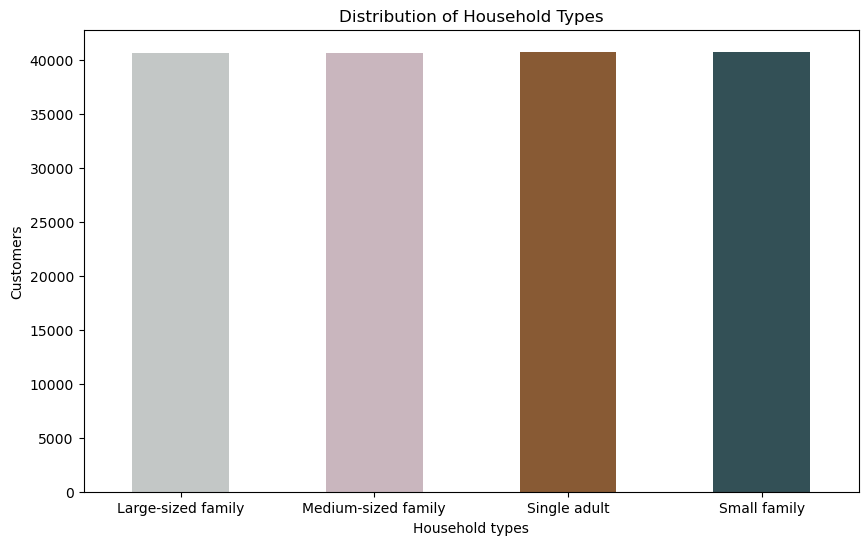

In [42]:
# Visualizing distribution of Household types
house_dist_bar = df.groupby('household_flag')['user_id'].nunique().plot.bar(xlabel = 'Household types', ylabel = 'Customers', color = ['#c3c7c6', '#c9b6be',
                                                          '#885a34', '#335056'],
                                                           title = 'Distribution of Household Types', figsize = (10, 6))
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'High Income'),
  Text(1, 0, 'Low Income'),
  Text(2, 0, 'Medium Income')])

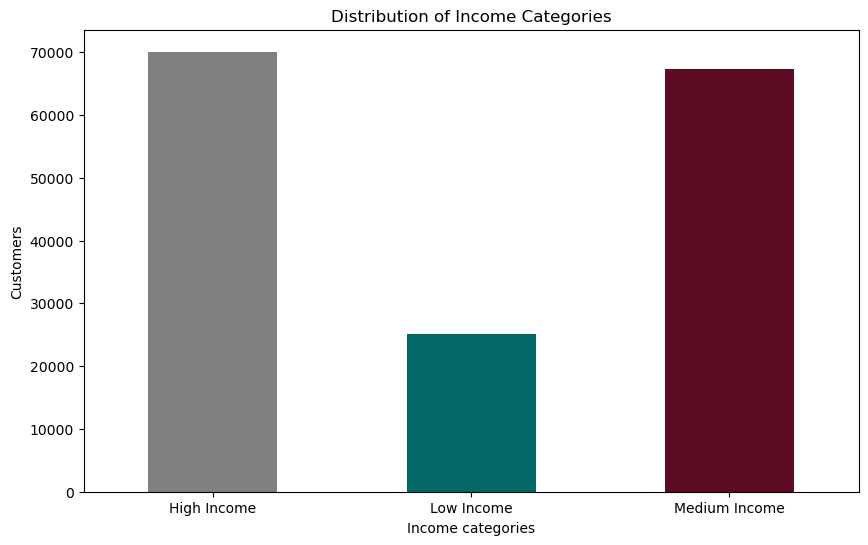

In [43]:
# Distribution of Income Category
income_dist_bar = df.groupby('income_flag')['user_id'].nunique().plot.bar(xlabel = 'Income categories', ylabel = 'Customers', color = ['#808080', '#046767',
                                                                                                                     '#5e0c23'],
                                                        title = 'Distribution of Income Categories', figsize = (10, 6))
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Daytime shoppers'),
  Text(1, 0, 'Early birds'),
  Text(2, 0, 'Evening shoppers'),
  Text(3, 0, 'Night Owls')])

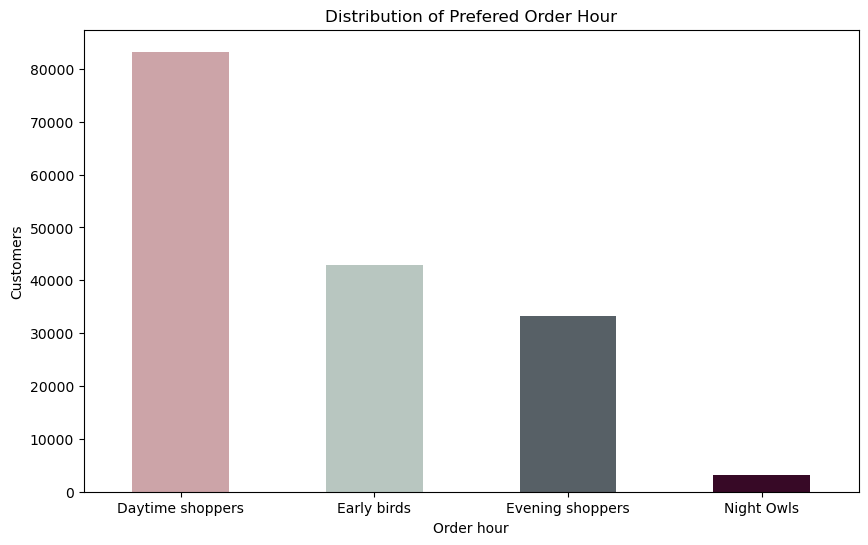

In [44]:
# Distribution of prefered ordering hour
ordering_hour_dist_bar = df.groupby('ordering_flag')['user_id'].nunique().plot.bar(xlabel = 'Order hour', ylabel = 'Customers', 
                                                          title = 'Distribution of Prefered Order Hour', figsize= (10,6),
                                                          color = ['#cca4a8', '#b8c6c0', '#576066', '#370926'])
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Middle-Aged Adult'),
  Text(1, 0, 'Senior Adult'),
  Text(2, 0, 'Young Adult')])

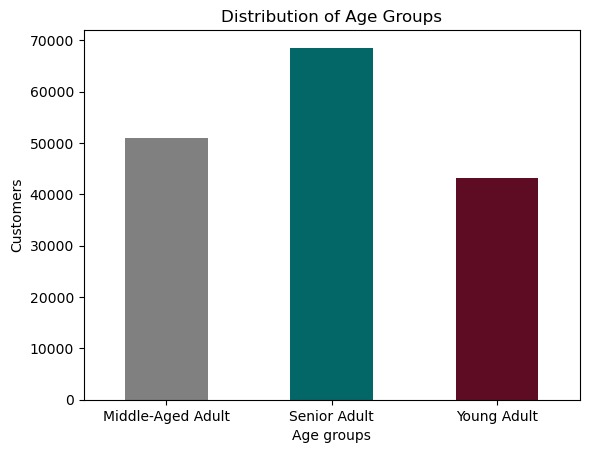

In [45]:
# Distribution of Age-Flag 
age_dist_bar = df.groupby('age_flag')['user_id'].nunique().plot.bar(xlabel = 'Age groups', ylabel = 'Customers', color = ['#808080', '#046767','#5e0c23'],
                                                     title = 'Distribution of Age Groups')
plt.xticks(rotation= 0)


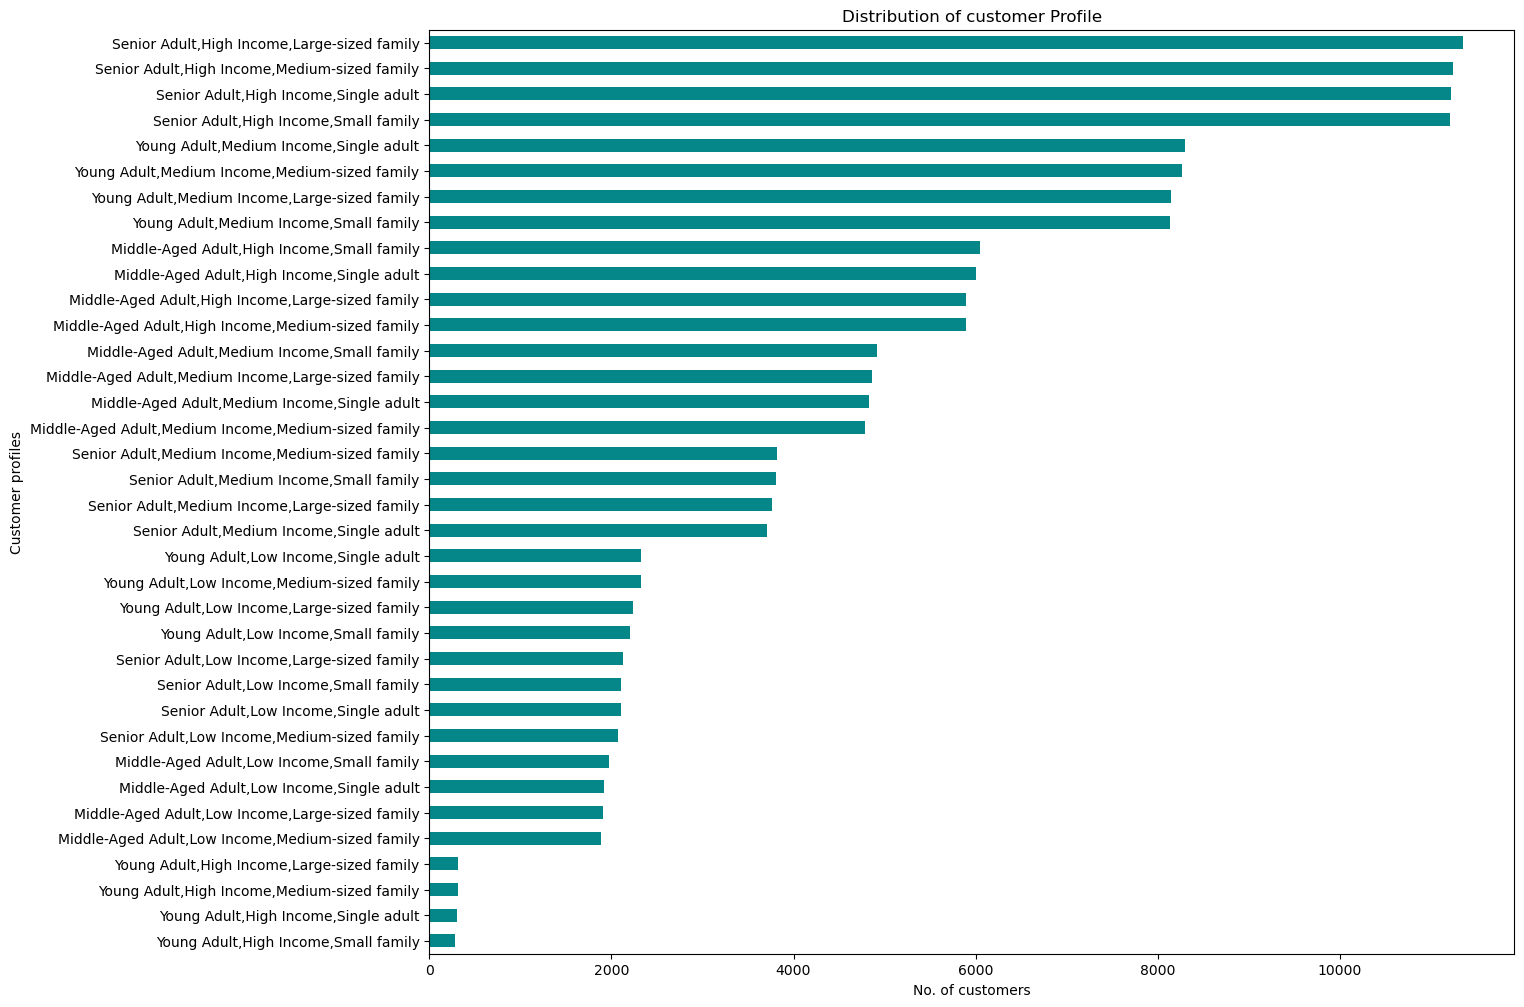

In [100]:
# Distributin of customer profiles
plt.figure(figsize=(14, 12))
dist_customer_profile = df.groupby('customer_profile')['user_id'].nunique().sort_values(ascending=True).plot.barh(color = '#05878a', xlabel= 'No. of customers',
                                                                                         ylabel = 'Customer profiles', 
                                                                                         title = 'Distribution of customer Profile')

## 07. Aggregating max, min, mean for usage frequency and expenditure

In [47]:
# max, min, and mean aggregation on Usage frequency
df_usage = df.groupby('customer_profile').agg({'median_days_bw_orders':['max', 'min', 'mean']})

In [48]:
df_usage

median_days_bw_orders       \
                                                                     max  min   
customer_profile                                                                
Middle-Aged Adult,High Income,Large-sized family                    30.0  0.0   
Middle-Aged Adult,High Income,Medium-sized family                   30.0  0.0   
Middle-Aged Adult,High Income,Single adult                          30.0  0.0   
Middle-Aged Adult,High Income,Small family                          30.0  0.0   
Middle-Aged Adult,Low Income,Large-sized family                     30.0  0.0   
Middle-Aged Adult,Low Income,Medium-sized family                    30.0  0.0   
Middle-Aged Adult,Low Income,Single adult                           30.0  0.0   
Middle-Aged Adult,Low Income,Small family                           30.0  0.0   
Middle-Aged Adult,Medium Income,Large-sized family                  30.0  0.0   
Middle-Aged Adult,Medium Income,Medium-sized fa...                  30.0  0.0   
Middle-Aged Adult,Medium Income,Single adult                        30.0  0.0   
Middle-Aged Adult,Medium Income,Small family                        30.0  0.0   
Senior Adult,High Income,Large-sized family                         30.0  0.0   
Senior Adult,High Income,Medium-sized family                        30.0  0.0   
Senior Adult,High Income,Single adult                               30.0  0.0   
Senior Adult,High Income,Small family                               30.0  0.0   
Senior Adult,Low Income,Large-sized family                          30.0  0.0   
Senior Adult,Low Income,Medium-sized family                         30.0  0.0   
Senior Adult,Low Income,Single adult                                30.0  0.0   
Senior Adult,Low Income,Small family                                30.0  0.0   
Senior Adult,Medium Income,Large-sized family                       30.0  0.0   
Senior Adult,Medium Income,Medium-sized family                      30.0  1.0   
Senior Adult,Medium Income,Single adult                             30.0  0.0   
Senior Adult,Medium Income,Small family                             30.0  0.0   
Young Adult,High Income,Large-sized family                          30.0  2.0   
Young Adult,High Income,Medium-sized family                         30.0  1.0   
Young Adult,High Income,Single adult                                30.0  1.0   
Young Adult,High Income,Small family                                30.0  1.0   
Young Adult,Low Income,Large-sized family                           30.0  0.0   
Young Adult,Low Income,Medium-sized family                          30.0  0.0   
Young Adult,Low Income,Single adult                                 30.0  0.0   
Young Adult,Low Income,Small family                                 30.0  0.0   
Young Adult,Medium Income,Large-sized family                        30.0  0.0   
Young Adult,Medium Income,Medium-sized family                       30.0  0.0   
Young Adult,Medium Income,Single adult                              30.0  0.0   
Young Adult,Medium Income,Small family                              30.0  0.0   

                                                               
                                                         mean  
customer_profile                                               
Middle-Aged Adult,High Income,Large-sized family     9.843185  
Middle-Aged Adult,High Income,Medium-sized family    9.953307  
Middle-Aged Adult,High Income,Single adult           9.880259  
Middle-Aged Adult,High Income,Small family           9.873918  
Middle-Aged Adult,Low Income,Large-sized family     10.684643  
Middle-Aged Adult,Low Income,Medium-sized family    10.810416  
Middle-Aged Adult,Low Income,Single adult           10.582250  
Middle-Aged Adult,Low Income,Small family           10.492282  
Middle-Aged Adult,Medium Income,Large-sized family   9.882935  
Middle-Aged Adult,Medium Income,Medium-sized fa...   9.877932  
Middle-Aged Adult,Medium Income,Single adult         9.9215

In [49]:
# max, min, and mean aggregation on expenditure
df_avg_price_agg = df.groupby('customer_profile').agg({'prices' : ['max', 'min', 'mean']})

In [50]:
df_avg_price_agg.sort_values(by=('prices', 'mean'), ascending = False)

prices               
                                                      max  min      mean
customer_profile                                                        
Senior Adult,High Income,Small family                25.0  1.0  7.963224
Young Adult,Medium Income,Large-sized family         25.0  1.0  7.959497
Middle-Aged Adult,High Income,Medium-sized family    25.0  1.0  7.959463
Middle-Aged Adult,High Income,Large-sized family     25.0  1.0  7.958427
Middle-Aged Adult,High Income,Small family           25.0  1.0  7.955454
Senior Adult,High Income,Medium-sized family         25.0  1.0  7.953519
Middle-Aged Adult,High Income,Single adult           25.0  1.0  7.951611
Senior Adult,High Income,Single adult                25.0  1.0  7.949955
Young Adult,Medium Income,Small family               25.0  1.0  7.949240
Senior Adult,High Income,Large-sized family          25.0  1.0  7.948552
Young Adult,Medium Income,Single adult               25.0  1.0  7.944802
Young Adult,Medium Income,Medium-sized family        25.0  1.0  7.942486
Young Adult,High Income,Single adult                 25.0  1.0  7.941406
Young Adult,High Income,Large-sized family           25.0  1.0  7.887954
Middle-Aged Adult,Medium Income,Small family         25.0  1.0  7.881175
Middle-Aged Adult,Medium Income,Single adult         25.0  1.0  7.877365
Middle-Aged Adult,Medium Income,Large-sized family   25.0  1.0  7.875344
Young Adult,High Income,Small family                 25.0  1.0  7.871669
Middle-Aged Adult,Medium Income,Medium-sized fa...   25.0  1.0  7.865331
Young Adult,High Income,Medium-sized family          25.0  1.0  7.859846
Senior Adult,Medium Income,Single adult              25.0  1.0  7.782111
Senior Adult,Medium Income,Small family              25.0  1.0  7.772712
Senior Adult,Medium Income,Large-sized family        25.0  1.0  7.770546
Senior Adult,Medium Income,Medium-sized family       25.0  1.0  7.757688
Young Adult,Low Income,Single adult                  25.0  1.0  6.928728
Young Adult,Low Income,Small family                  25.0  1.0  6.924054
Young Adult,Low Income,Large-sized family            25.0  1.0  6.907715
Young Adult,Low Income,Medium-sized family           25.0  1.0  6.870775
Middle-Aged Adult,Low Income,Large-sized family      25.0  1.0  6.692181
Middle-Aged Adult,Low Income,Small family            25.0  1.0  6.661678
Middle-Aged Adult,Low Income,Medium-sized family     25.0  1.0  6.661403
Middle-Aged Adult,Low Income,Single adult            25.0  1.0  6.642438
Senior Adult,Low Income,Medium-sized family          25.0  1.0  6.521662
Senior Adult,Low Income,Single adult                 25.0  1.0  6.519443
Senior Adult,Low Income,Small family                 25.0  1.0  6.502635
Senior Adult,Low Income,Large-sized family           25.0  1.0  6.488232

## 08. Comparing Customers Profiles with geographic regions and department_id

## A. Customer Profiles and Regions

### i) Comparing profiles in 4 regions by income flag

In [105]:
# We have used max_order by user_id as a metric for comparison
df_income = pd.crosstab(df['region'], df['income_flag'], values = df['max_order'], aggfunc = 'mean', dropna = False)

In [106]:
df_income

income_flag,High Income,Low Income,Medium Income
region,,,
Midwest,34.353944,31.835273,33.996860
Northeast,34.577792,32.140994,35.246116
South,34.440524,33.071882,34.883610
West,34.972525,32.125492,35.005234


### ii) Comparing profiles in 4 regions by age flag

In [109]:
# We have used max_order by user_id as a metric for comparison
df_age = pd.crosstab(df['region'],df['age_flag'], values = df['max_order'], aggfunc = 'mean', dropna = False)

In [110]:
print(df_age)

age_flag   Middle-Aged Adult  Senior Adult  Young Adult
region                                                 
Midwest            34.375931     33.759890    33.662168
Northeast          33.860498     34.752948    35.226469
South              34.425665     34.325739    34.792879
West               35.204146     34.746157    33.957229


### iii) Comparing profiles in 4 regions by household flag

In [112]:
# We have used max_order by user_id as a metric for comparison
df_household = pd.crosstab (df['region'],df['household_flag'], values = df['max_order'], aggfunc = 'mean', dropna = False)

In [113]:
print(df_household)

household_flag  Large-sized family  Medium-sized family  Single adult  \
region                                                                  
Midwest                  33.368172            33.732907     34.519271   
Northeast                35.006471            34.594925     34.188519   
South                    34.598693            34.386580     34.731294   
West                     34.696198            34.353214     35.080938   

household_flag  Small family  
region                        
Midwest            34.088682  
Northeast          34.620795  
South              34.209334  
West               34.593664  


In [114]:
# We have used max_order by user_id as a metric for comparison
df_ordering = pd.crosstab( df['region'],df['ordering_flag'], values = df['max_order'], aggfunc = 'mean', dropna = False)

In [115]:
df_ordering

ordering_flag,Daytime shoppers,Early birds,Evening shoppers,Night Owls
region,,,,
Midwest,33.002627,37.331133,31.837462,27.215238
Northeast,34.008272,38.382607,30.939162,28.241046
South,33.362135,38.867951,31.101242,29.475681
West,33.556864,38.634903,32.136801,26.532153


## B. Customer Profiles and Departments

In [83]:
# Adding the names of the departments to increase readability
df = df.merge(dept, on ='department_id')

In [43]:
# Checking df columns to make sure department is added
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_bw_orders', 'order_frequency', 'gender',
       'state', 'age', 'date_joined', 'no_of_dependants', 'fam_status',
       'income', '_merge', 'region', 'exclusion_flag', 'age_flag',
       'income_flag', 'mode_order_hour', 'ordering_flag', 'household_flag',
       'customer_profile', 'department'],
      dtype='object')

### i) Income flag and Departments

In [61]:
# Comparing income_flag and departments
dept_income = pd.crosstab(df['department'], df['income_flag'])

In [62]:
print(dept_income)

income_flag      High Income  Low Income  Medium Income
department                                             
alcohol                69142       18047          57438
babies                196704       29240         184448
bakery                527711      106757         486360
beverages            1126462      383121        1062318
breakfast             297596       91408         281846
bulk                   14218        4676          14557
canned goods          485253       78975         447846
dairy eggs           2406211      502363        2268608
deli                  462099      106448         435287
dry goods pasta       392731       64481         364924
frozen                988500      215177         918054
household             319959       87216         292682
international         119991       21636         114364
meat seafood          335552       34278         304951
missing                29455        6547          28766
other                  15750        3886        

### ii) Age flag and departments

In [63]:
# Comparing age_flag and departments
dept_age = pd.crosstab(df['department'], df['age_flag'])

In [64]:
# Printing output
print(dept_age)

age_flag         Middle-Aged Adult  Senior Adult  Young Adult
department                                                   
alcohol                      45055         59355        40217
babies                      134357        168735       107300
bakery                      352133        469974       298721
beverages                   806816       1088068       677017
breakfast                   210891        279636       180323
bulk                         10439         13991         9021
canned goods                317582        423707       270785
dairy eggs                 1625233       2165648      1386301
deli                        314763        422601       266470
dry goods pasta             257641        344752       219743
frozen                      666098        894069       561564
household                   220611        294874       184372
international                80797        106093        69101
meat seafood                210028        285695       179058
missing 

### iii) Household flag and Departments

In [65]:
dept_household = pd.crosstab(df['department'], df['household_flag'])

In [66]:
# printing output
dept_household

household_flag,Large-sized family,Medium-sized family,Single adult,Small family
department,,,,
alcohol,37333,34668,36827,35799
babies,102585,104574,103328,99905
bakery,279822,279221,281395,280390
beverages,640927,646886,645341,638747
breakfast,167322,167854,166432,169242
bulk,8403,8475,8000,8573
canned goods,255325,252716,251020,253013
dairy eggs,1296264,1288883,1294376,1297659
deli,252592,249967,253382,247893


### iv) Ordering Flag and Departments

In [67]:
dept_ordering = pd.crosstab(df['department'], df['ordering_flag'])

In [68]:
# Print output
dept_ordering

ordering_flag,Daytime shoppers,Early birds,Evening shoppers,Night Owls
department,,,,
alcohol,80658,37324,25315,1330
babies,199835,128105,77137,5315
bakery,579648,319404,206127,15649
beverages,1284775,782244,466931,37951
breakfast,329612,208296,123482,9460
bulk,16231,10487,6199,534
canned goods,539229,266900,190701,15244
dairy eggs,2583633,1571982,948815,72752
deli,517485,280269,191221,14859


## 09. Visualizations

### Visualizations for question number 7 of part 1.

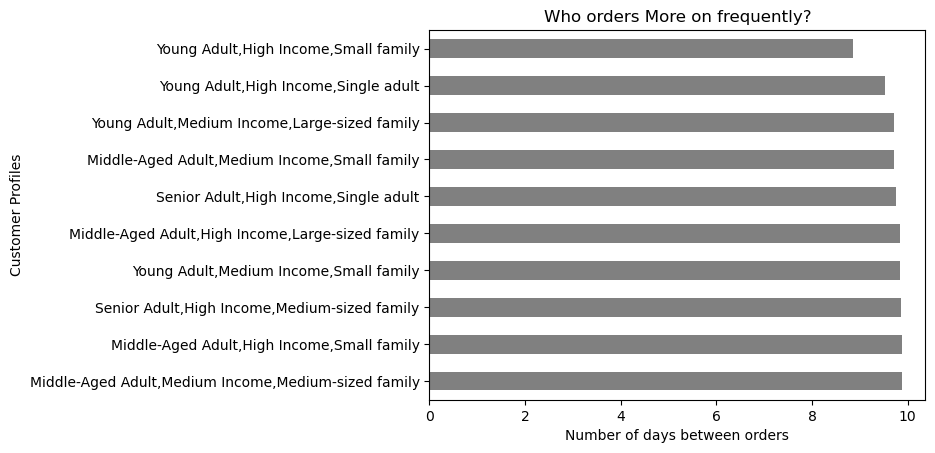

In [69]:
# On average, who places order most frequenctly?
top10_usage_bar = df_usage['median_days_bw_orders', 'mean'].nsmallest(10).sort_values(ascending = False).plot.barh(ylabel = 'Customer Profiles', 
                                                                                                 xlabel = 'Number of days between orders', 
                                                     title = 'Who orders More on frequently?',
                                                    color = '#808080')

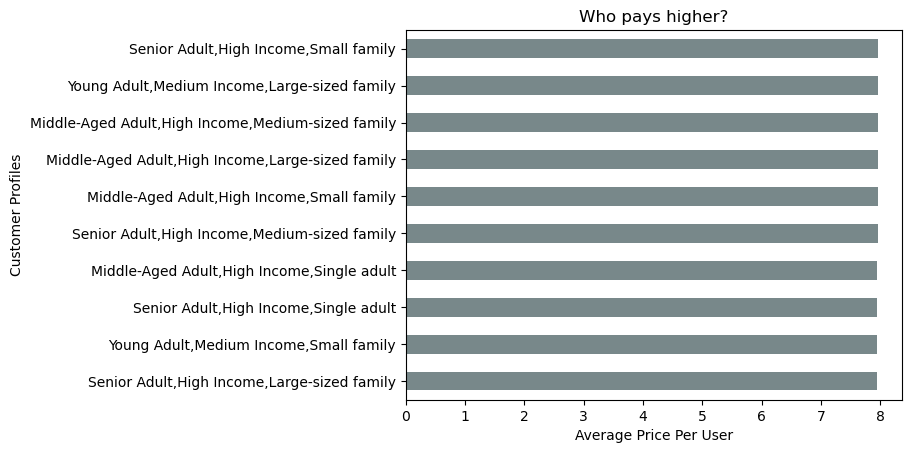

In [70]:
top_10_payers_bar = df_avg_price_agg['prices', 'mean'].nlargest(10).sort_values(ascending = True).plot.barh(ylabel = 'Customer Profiles', 
                                                                                           xlabel = 'Average Price Per User', 
                                                                                           title = 'Who pays higher?',
                                                                                           color = '#78888a')

### i) Income flag and regions visualization

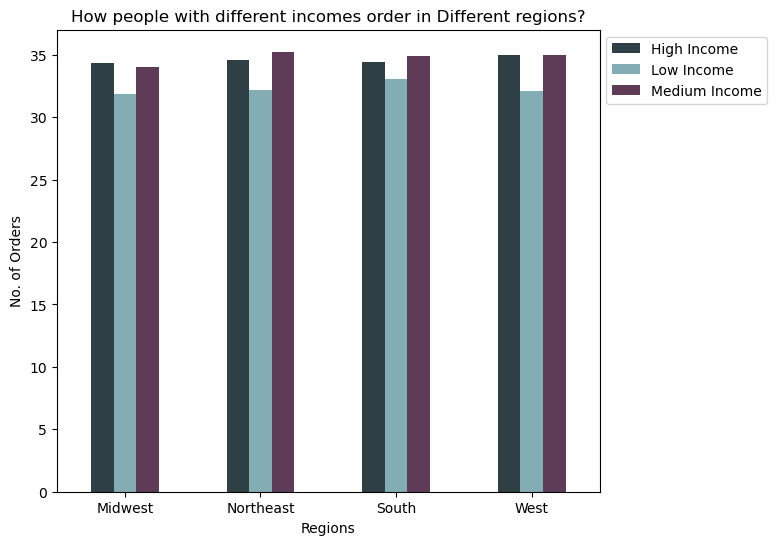

In [122]:
# The metric for comparison was number of orders placed.
income_region_bar = df_income.plot.bar(title = 'How people with different incomes order in Different regions?', xlabel = 'Regions',
                  ylabel = 'No. of Orders', color = ['#2e4045', '#83adb5', '#5e3c58'], figsize = (7,6))
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


### ii) Age groups and Regions Visualization

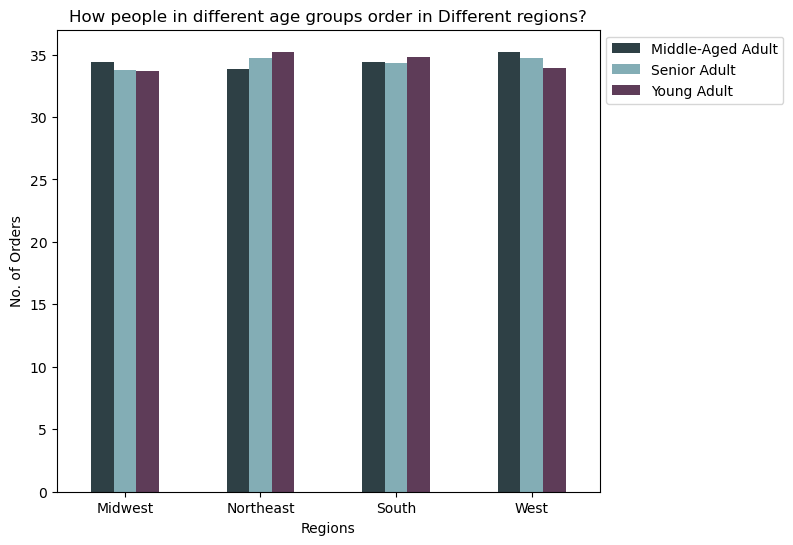

In [123]:
age_region_bar = df_age.plot.bar(title = 'How people in different age groups order in Different regions?', xlabel = 'Regions', ylabel = 'No. of Orders',
               figsize = (7,6), color = ['#2e4045', '#83adb5', '#5e3c58'])
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### iii) Household type and regions visualization

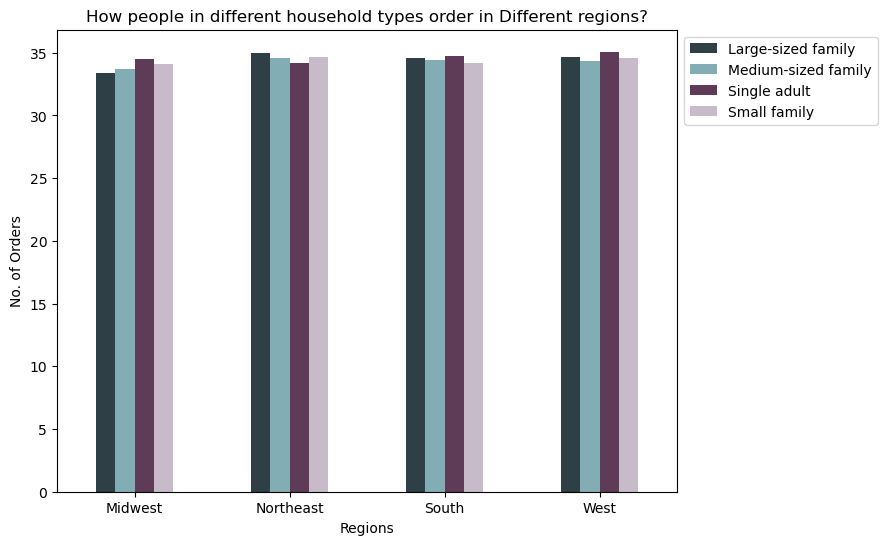

In [124]:
hous_region_bar = df_household.plot.bar(title = 'How people in different household types order in Different regions?', xlabel = 'Regions', 
                      ylabel = 'No. of Orders', figsize = (8,6), color = ['#2e4045', '#83adb5', '#5e3c58', '#c7bbc9'])
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


### iv) Ordering type and Regions Visualization

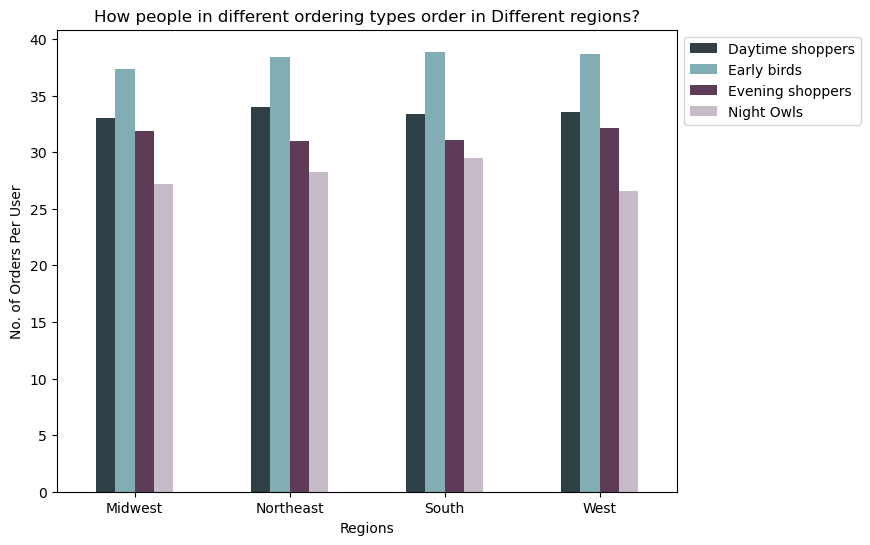

In [125]:
order_region_bar = df_ordering.plot.bar(title = 'How people in different ordering types order in Different regions?', xlabel = 'Regions', 
                      ylabel = 'No. of Orders Per User', figsize = (8,6), color = ['#2e4045', '#83adb5', '#5e3c58','#c7bbc9'])
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### v) Orders by Departments

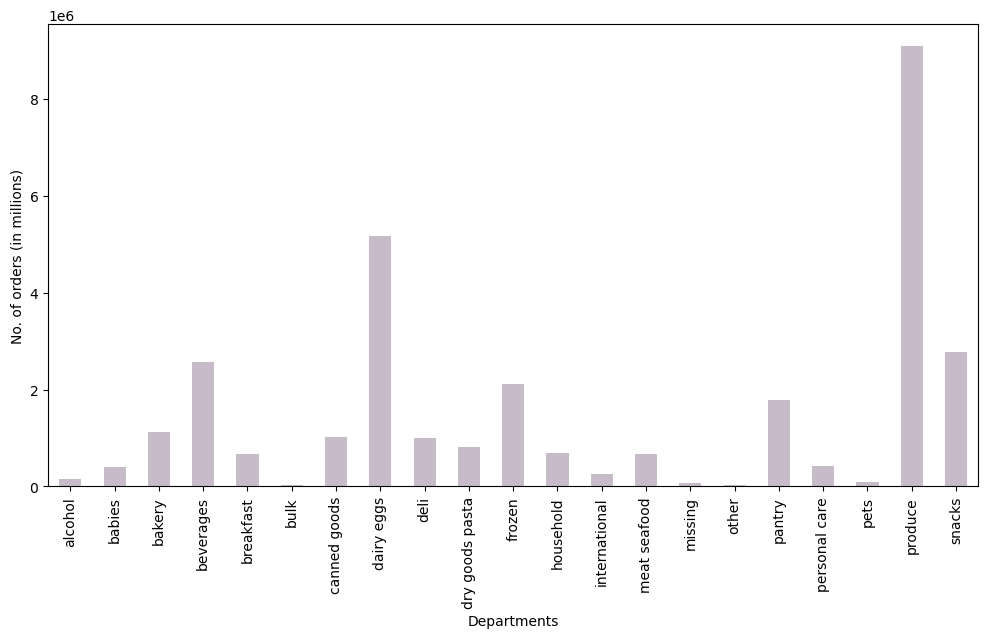

In [95]:
# Departments and Orders
orders_dept = df['department'].value_counts().sort_index().plot.bar(xlabel = 'Departments', ylabel = 'No. of orders (in millions)',
                                                     color = '#c7bbc9', figsize= (12,6))

### vi) Income Groups and Departments 

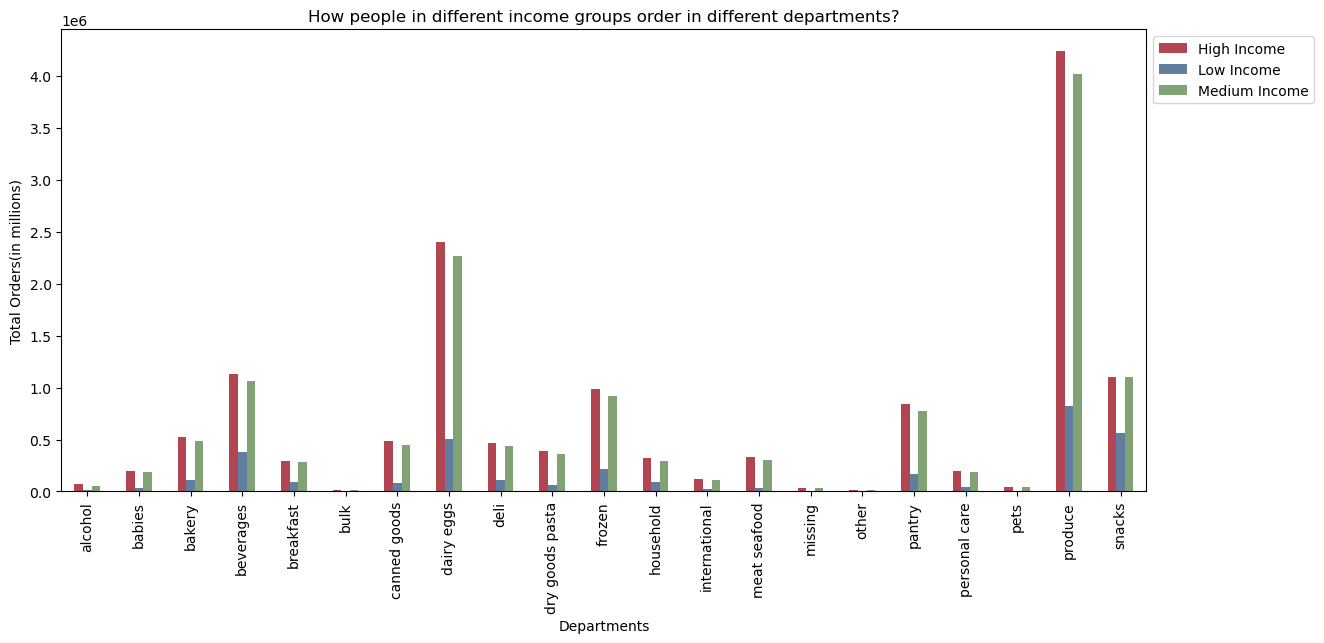

In [75]:
income_dept_bar = dept_income.plot.bar(title = 'How people in different income groups order in different departments?', xlabel = 'Departments', 
                      ylabel = 'Total Orders(in millions)',figsize = (14,6), color = ['#b14552', '#617d9f', '#81a275'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### vii) Age groups and Departments

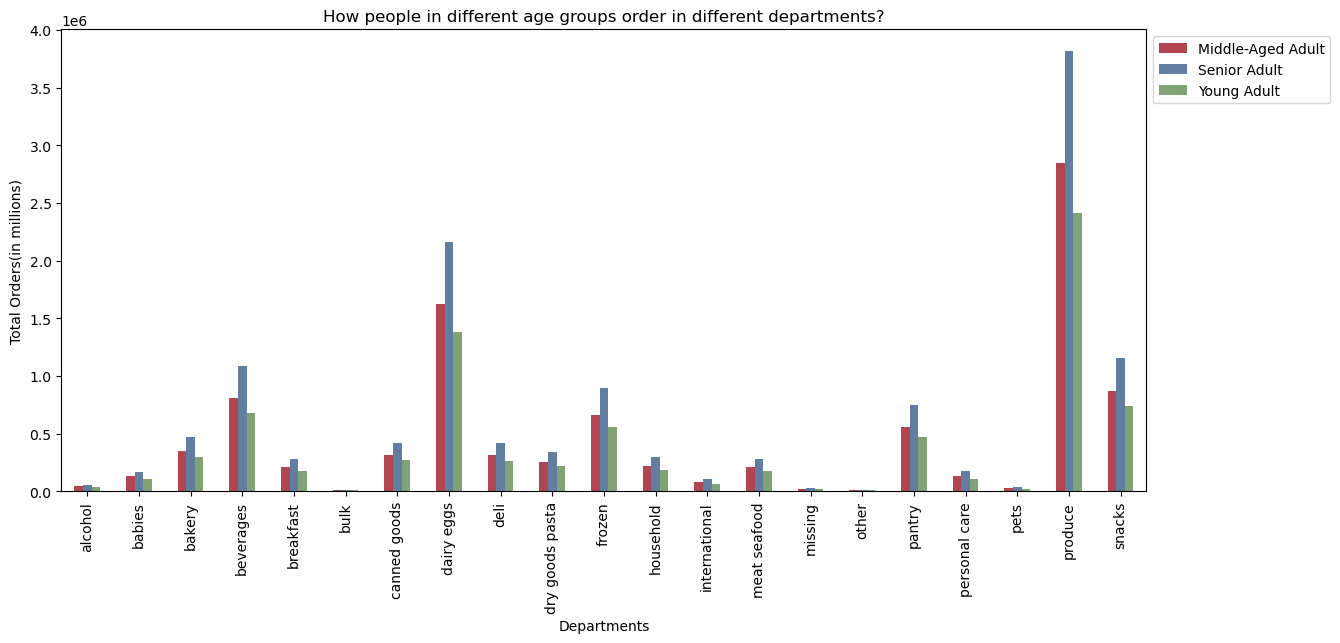

In [76]:
dept_age_bar = dept_age.plot.bar(title = 'How people in different age groups order in different departments?', xlabel = 'Departments', 
                      ylabel = 'Total Orders(in millions)',figsize = (14,6), color = ['#b14552', '#617d9f', '#81a275'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### viii) Household and Departments

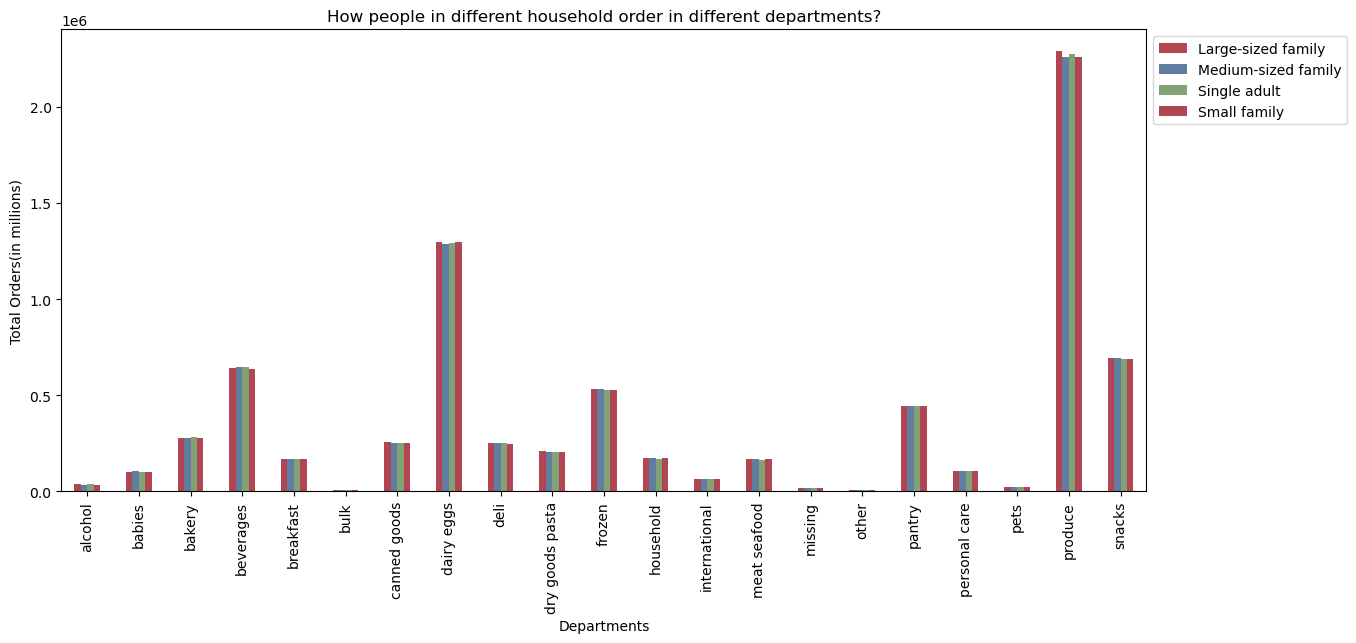

In [77]:
dept_household_bar = dept_household.plot.bar(title = 'How people in different household order in different departments?', xlabel = 'Departments', 
                      ylabel = 'Total Orders(in millions)',figsize = (14,6), color = ['#b14552', '#617d9f', '#81a275'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### ix) Ordering type and Departments

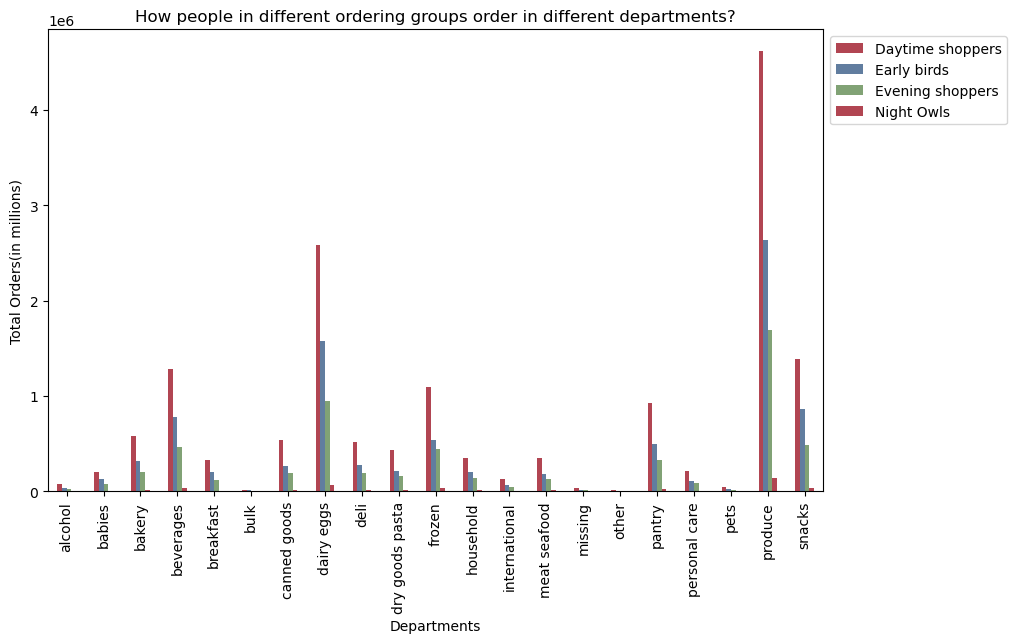

In [78]:
dept_order_bar = dept_ordering.plot.bar(title = 'How people in different ordering groups order in different departments?', xlabel = 'Departments', 
                      ylabel = 'Total Orders(in millions)',figsize = (10,6), color = ['#b14552', '#617d9f', '#81a275'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### x) Brand Loyalty and ordering habit

In [127]:
# Creating Crosstab of brand loyalty and ordering habit
loy_ord = pd.crosstab( df['ordering_flag'], df['loyalty_flag'])

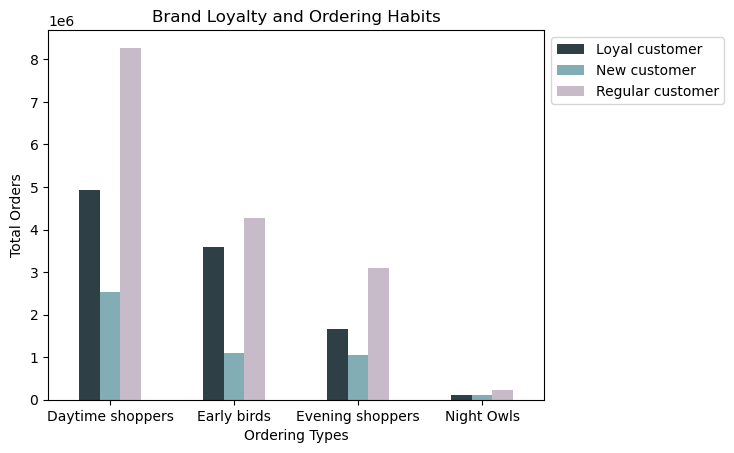

In [128]:
# Plotting Brand Loyalty and ordering habits
loy_ord_bar = loy_ord.plot.bar(xlabel = 'Ordering Types', ylabel = 'Total Orders', title = 'Brand Loyalty and Ordering Habits',
                 color=['#2e4045', '#83adb5', '#c7bbc9'])
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### xi) Spending Flag and Region

<Axes: title={'center': 'Low spenders distribution'}, xlabel='region', ylabel='No. of Users(in 10 millions)'>

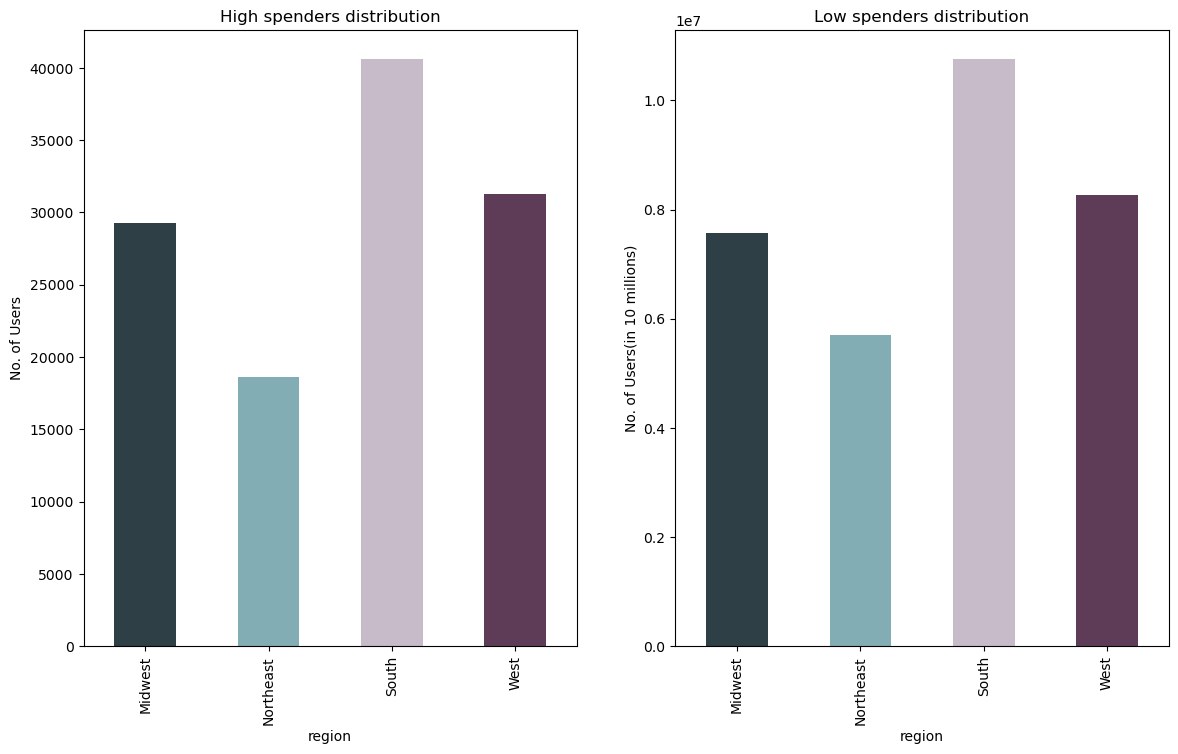

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
region_spender= reg_spending['High Spender'].plot.bar(ax=axs[0],title = 'High spenders distribution', 
                                                        ylabel = 'No. of Users', color = ['#2e4045', '#83adb5', '#c7bbc9', '#5e3c58'])

reg_spending['Low Spender'].plot.bar(ax=axs[1],title = 'Low spenders distribution', ylabel = 'No. of Users(in 10 millions)',
                                                      color = ['#2e4045', '#83adb5','#c7bbc9', '#5e3c58'])

### xii) Brand Loyalty and Regions

In [129]:
loy_region = pd.crosstab(df['region'], df['loyalty_flag'])

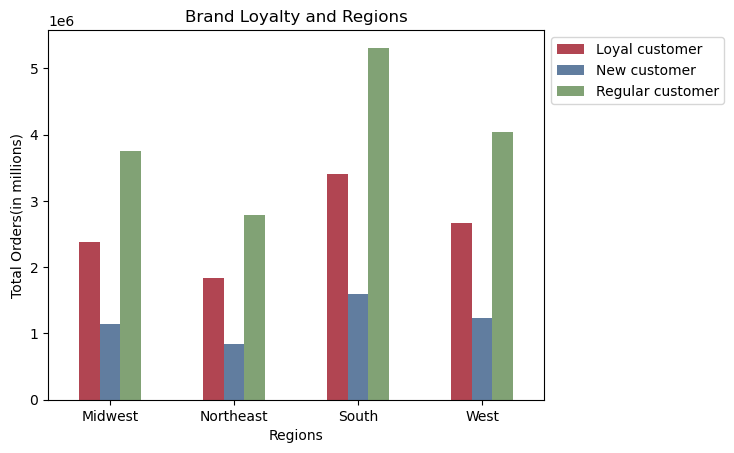

In [137]:
loyal_region = loy_region.plot.bar(xlabel = 'Regions', ylabel = 'Total Orders(in millions)', title= 'Brand Loyalty and Regions',
                   color = ['#b14552', '#617d9f', '#81a275'])
plt.xticks(rotation = 0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## 10. Exporting Files and Viusalizations

In [94]:
# Exporting Household Distribution
house_dist_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'household_dist_bar.png'))

In [96]:
# Exporting Income Distribution Bar Chart
income_dist_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_dist_bar.png'))

In [97]:
# Exporting Ordering hour distribution bar chart
ordering_hour_dist_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ordering_hour_dist_bar.png'))

In [98]:
# Exporting Age distribution bar chart
age_dist_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dist_bar.png'))

In [99]:
# Exporting customer profile distribution
dist_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer_profile_dist.png'))

In [100]:
# Exporting frequent orders profile
top10_usage_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequent_orders_profile.png'))

In [101]:
# Exporting top 10 payers profile
top_10_payers_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top10_payers_bar.png'))

In [102]:
# Exporting income flag and region flag
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_and_region.png'))

In [103]:
# Exporting age flag and region flag
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_and_region.png'))

In [104]:
# Exporting income flag and region flag
hous_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'household_and_region.png'))

In [105]:
# Exporting ordering flag and region flag
order_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ordering_and_region.png'))

In [106]:
# Exporting income flag and departments
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_and_department.png'))

In [111]:
# Exporting age flag and departments
dept_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_and_department.png'))

In [108]:
# Exporting household flag and departments
dept_household_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'household_and_department.png'))

In [110]:
# Exporting income flag and departments
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_and_department.png'))

In [109]:
# Ordering flag and departments
dept_order_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ordering_and_department.png'))

In [112]:
# Brandloyalty and ordering
loy_ord_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Brand_loyalty_and_ordering.png'))

In [79]:
region_spender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spender.png'))

In [94]:
orders_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_orders.png'))

In [138]:
loyal_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'brand_loyalty_region.png'))

In [44]:
# exporting sample dataframe
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments_sample.pkl'))